# ML lec 02 - Linear Regression의 Hypothesis와 Cost

## Predicting exam score: regression

In [25]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

## (Linear) Hypothesis(r가설, 추정)
- H(x) = Wx + b

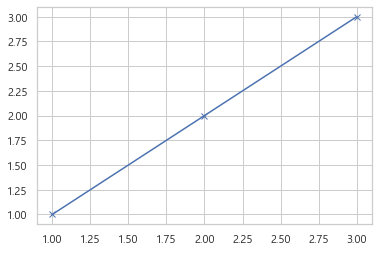

In [7]:
x = [1,2,3]
y = [1,2,3]

plt.plot(x, y, marker='x')

In [8]:
## Which hypothesis is bettr

## Cost function (Loss function)
- How fit the line to our (training) data
  - H(x) - y
  - (H(x) -y) ** 2
  - (H(x1) -y1)**2 + (H(x2) -y2)**2 + (H(x3) -y3)**2 / 3
  -  

## Cost function
- How fit the line to our (training) data
  - H(x) - y
  - (H(x) -y) ** 2
  - (H(x1) -y1)**2 + (H(x2) -y2)**2 + (H(x3) -y3)**2 / 3
  - cost = $s^2+2s+s\over s+\sqrt s+1$


# ML Lab 02 - TensorFlow로 간단한 linear regression을 구현

## 참고 사이트
- https://github.com/hunkim/DeepLearningZeroToAll

## Hypothesis and cost function
- H(x) = Wx + b
- cost(W, b) = 1/mSUM(i to m)(H(x(i)) - y(i))**2

## TensorFlow Mechanics
1. Build graph using TensorFlow operations
2. feed data and run graph(operation
    - sess.run(op, feed_dict={x: x_data})
3. update variables in the graph (and return values)

## 1. Build graph using TF operations

In [22]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# H(x) = Wx + b

# X adn Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b


# cost(W, b) = 1/mSUM(i to m)(H(x(i)) - y(i))**2
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Gradient Descent
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#optimizer = tf.optimizers.SGD (lr_decay=0.0, decay_step=100, staircase=False, use_locking=False, name='SGD')
train = optimizer.minimize(cost)



## 2,3 Run/update graph and get results

In [23]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))


0 22.068369 [-1.4358592] [0.6158092]
20 0.45790124 [0.23458788] [1.2713426]
40 0.23830207 [0.41871786] [1.2767693]
60 0.21481974 [0.46014354] [1.2229717]
80 0.19508809 [0.4868582] [1.1660874]
100 0.17718197 [0.5111019] [1.1113417]
120 0.16091947 [0.5340906] [1.059118]
140 0.14614965 [0.5559877] [1.0093439]
160 0.13273546 [0.57685477] [0.9619086]
180 0.12055246 [0.596741] [0.9167024]
200 0.109487675 [0.61569273] [0.8736206]
220 0.09943843 [0.63375384] [0.83256364]
240 0.090311565 [0.65096605] [0.79343617]
260 0.08202241 [0.66736937] [0.75614756]
280 0.074494086 [0.6830019] [0.72061145]
300 0.06765672 [0.6978995] [0.68674535]
320 0.061446894 [0.71209717] [0.6544708]
340 0.055807028 [0.72562754] [0.623713]
360 0.050684843 [0.7385221] [0.5944008]
380 0.0460328 [0.75081056] [0.56646615]
400 0.04180771 [0.76252156] [0.53984433]
420 0.03797044 [0.7736822] [0.5144737]
440 0.03448537 [0.7843183] [0.49029523]
460 0.03132016 [0.7944545] [0.46725315]
480 0.028445462 [0.8041144] [0.445294]
500 0.02

## Placeholders

In [26]:
# X and Y data
x_train = [1,2,3]
y_train = [1,2,3]

# Now we can use X and Y in place of x_data and y_data
# # placeholders for a tensor that will be always fed using feed_dict
# See http://stackoverflow.com/questions/36693740/
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
...

# Fit the line
for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train],
                  feed_dict={X:[1,2,3], Y: [1,2,3]})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)


0 1.8896737e-05 [0.9949634] [0.01144957]
20 1.7162203e-05 [0.99520004] [0.01091143]
40 1.5587206e-05 [0.99542564] [0.01039862]
60 1.4156226e-05 [0.9956406] [0.00990993]
80 1.2856864e-05 [0.99584544] [0.00944422]
100 1.1677239e-05 [0.9960407] [0.00900038]
120 1.0605196e-05 [0.99622685] [0.00857738]
140 9.631997e-06 [0.9964041] [0.00817426]
160 8.747748e-06 [0.99657315] [0.0077901]
180 7.94468e-06 [0.9967342] [0.00742397]
200 7.2153744e-06 [0.9968877] [0.00707506]
220 6.553221e-06 [0.9970339] [0.00674255]
240 5.9520003e-06 [0.9971733] [0.0064257]
260 5.4056986e-06 [0.9973061] [0.00612374]
280 4.9093915e-06 [0.99743277] [0.00583596]
300 4.459001e-06 [0.9975534] [0.00556169]
320 4.0497102e-06 [0.9976683] [0.00530032]
340 3.6780857e-06 [0.99777794] [0.00505124]
360 3.3402823e-06 [0.99788237] [0.00481386]
380 3.0338172e-06 [0.9979819] [0.00458764]
400 2.7554288e-06 [0.99807674] [0.00437205]
420 2.5025238e-06 [0.9981671] [0.00416657]
440 2.272866e-06 [0.9982532] [0.00397078]
460 2.064202e-06 

In [19]:
import  tensorflow as tf
import  numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x_data=np.random.rand(1,10).astype(np.float32)
y_data=x_data*0.1+0.3


Weights = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))
y=Weights*x_data+biases

loss=tf.reduce_mean(tf.square(y-y_data))

optimizer=tf.train.GradientDescentOptimizer(0.5)
train=optimizer.minimize(loss)

init = tf.global_variables_initializer()  

sess = tf.Session()
sess.run(init)          

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(Weights), sess.run(biases))

Instructions for updating:
non-resource variables are not supported in the long term
0 [-0.3851604] [0.7885341]
20 [-0.00456104] [0.3567649]
40 [0.08113585] [0.31024113]
60 [0.09659665] [0.30184764]
80 [0.09938598] [0.30033335]
100 [0.09988923] [0.30006015]
120 [0.09998] [0.30001086]
140 [0.09999638] [0.30000198]
160 [0.09999935] [0.30000037]
180 [0.0999999] [0.30000007]
200 [0.09999991] [0.30000007]
